# Project NOAH api

* [API](http://noah.up.edu.ph/apidocs/)

Data
* api/doppler
* api/floodMaps
* api/floodReports
* api/fourHourForecast
* api/landslideMaps
* api/latestContour
* api/satellite
* api/sevenDayForecast
* api/stormSurgeMaps
* api/stationByTypeID
* api/stations

In [1]:
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 20
rcParams['ytick.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 'large'

In [2]:
noah_data = ['doppler', 'fourHourForecast', 
             'landslide_maps', 'latest_contour', 'satellite', 'seven_day_forecast', 
             'storm_surge_maps', 'stationByTypeID', 'stations']

Flood maps and flood reports are analyzed in separate notebook.

In [3]:
import pandas as pd
from tqdm import tqdm

base_url = 'http://noah.up.edu.ph/api/'


json_data = {}

for i in tqdm(noah_data):
    print(i)
    if i=='flood_reports':
        annual_data = {}
        for year in range(2000,2019):
            annual_data[year] = pd.read_json(base_url+'reports/flood/'+str(year))
        json_data[i] = annual_data
    elif i=='satellite':
        json_data[i] = pd.read_json(base_url+'mtsat')
    else:
        json_data[i]=pd.read_json(base_url+i)

  0%|          | 0/9 [00:00<?, ?it/s]

doppler


 11%|█         | 1/9 [00:00<00:02,  3.81it/s]

fourHourForecast


 22%|██▏       | 2/9 [00:00<00:01,  3.94it/s]

landslide_maps


 33%|███▎      | 3/9 [00:01<00:03,  1.75it/s]

latest_contour


 44%|████▍     | 4/9 [00:02<00:02,  2.12it/s]

satellite


 56%|█████▌    | 5/9 [00:02<00:01,  2.50it/s]

seven_day_forecast


 67%|██████▋   | 6/9 [00:03<00:02,  1.49it/s]

storm_surge_maps


 78%|███████▊  | 7/9 [00:04<00:01,  1.33it/s]

stationByTypeID


 89%|████████▉ | 8/9 [00:04<00:00,  1.67it/s]

stations


100%|██████████| 9/9 [00:05<00:00,  1.56it/s]


## Doppler data

In [4]:
json_data['doppler']

,extent,gif_url,size,url,verbose_name
0,"[115.969111093, 3.80912641587, 129.511990464, ...",http://mahar.pscigrid.gov.ph/static/img/latest...,"[1020, 1393]",http://mahar.pscigrid.gov.ph/static/img/latest...,PAGASA RADAR Mosaic
1,"[119.645, 16.551389, 123.435, 20.148611]",http://climatex.dost.gov.ph/img/latestAPA.gif,"[622, 622]",http://climatex.dost.gov.ph/img/latestAPA.png,Aparri Station
2,"[118.6529, 14.5471, 122.2565, 18.1507]",http://climatex.dost.gov.ph/img/latestBAG.gif,"[622, 622]",http://climatex.dost.gov.ph/img/latestBAG.png,Baguio Station
3,"[119.695, 13.925, 123.405, 17.562]",http://climatex.dost.gov.ph/img/latestBAL.gif,"[622, 622]",http://climatex.dost.gov.ph/img/latestBAL.png,Baler Station
4,"[122.0784, 8.5208, 125.682, 12.1244]",http://climatex.dost.gov.ph/img/latestCEB.gif,"[622, 622]",http://climatex.dost.gov.ph/img/latestCEB.png,Cebu Station
5,"[122.2571, 7.5463000000000005, 129.2547, 14.5439]",http://climatex.dost.gov.ph/img/latestGUI.gif,"[622, 622]",http://climatex.dost.gov.ph/img/latestGUI.png,Guiuan Station
6,"[124.4367, 6.5655, 128.0403, 10.1691]",http://climatex.dost.gov.ph/img/latestHIN.gif,"[622, 622]",http://climatex.dost.gov.ph/img/latestHIN.png,Hinatuan Station
7,"[118.4619, 13.0203, 122.0655, 16.6239]",http://climatex.dost.gov.ph/img/latestSUB.gif,"[622, 622]",http://climatex.dost.gov.ph/img/latestSUB.png,Subic Station
8,"[119.1204, 12.3403, 122.724, 15.944]",http://climatex.dost.gov.ph/img/latestTAG.gif,"[622, 622]",http://climatex.dost.gov.ph/img/latestTAG.png,Tagaytay Station
9,"[123.1206, 4.6189, 126.7406, 8.2161]",http://climatex.dost.gov.ph/img/latestTAM.gif,"[622, 622]",http://climatex.dost.gov.ph/img/latestTAM.png,Tampakan Station


In [5]:
from PIL import Image
#python3
try: 
    from urllib.request import urlopen, Request
    from urllib.error import HTTPError
#python2
except ImportError:
    from urllib2 import urlopen, Request, HTTPError

img_url = json_data['doppler']['url'][1]
img = Image.open(urlopen(img_url))

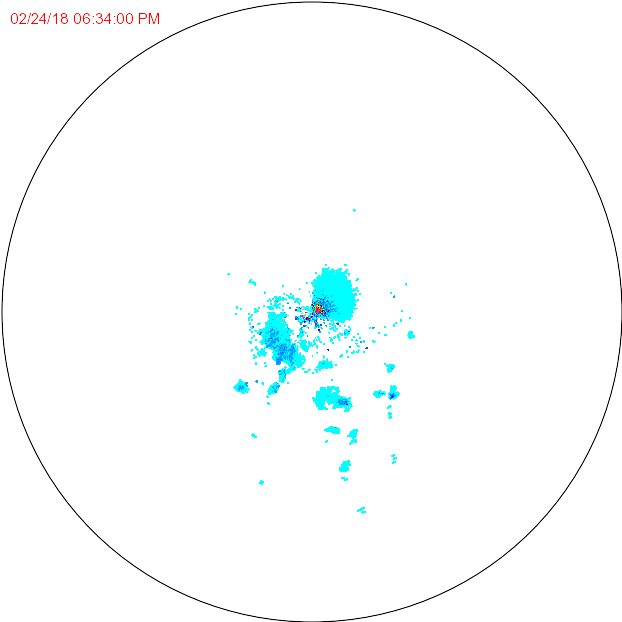

In [6]:
img

/home/jp/miniconda3/envs/astroconda35/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


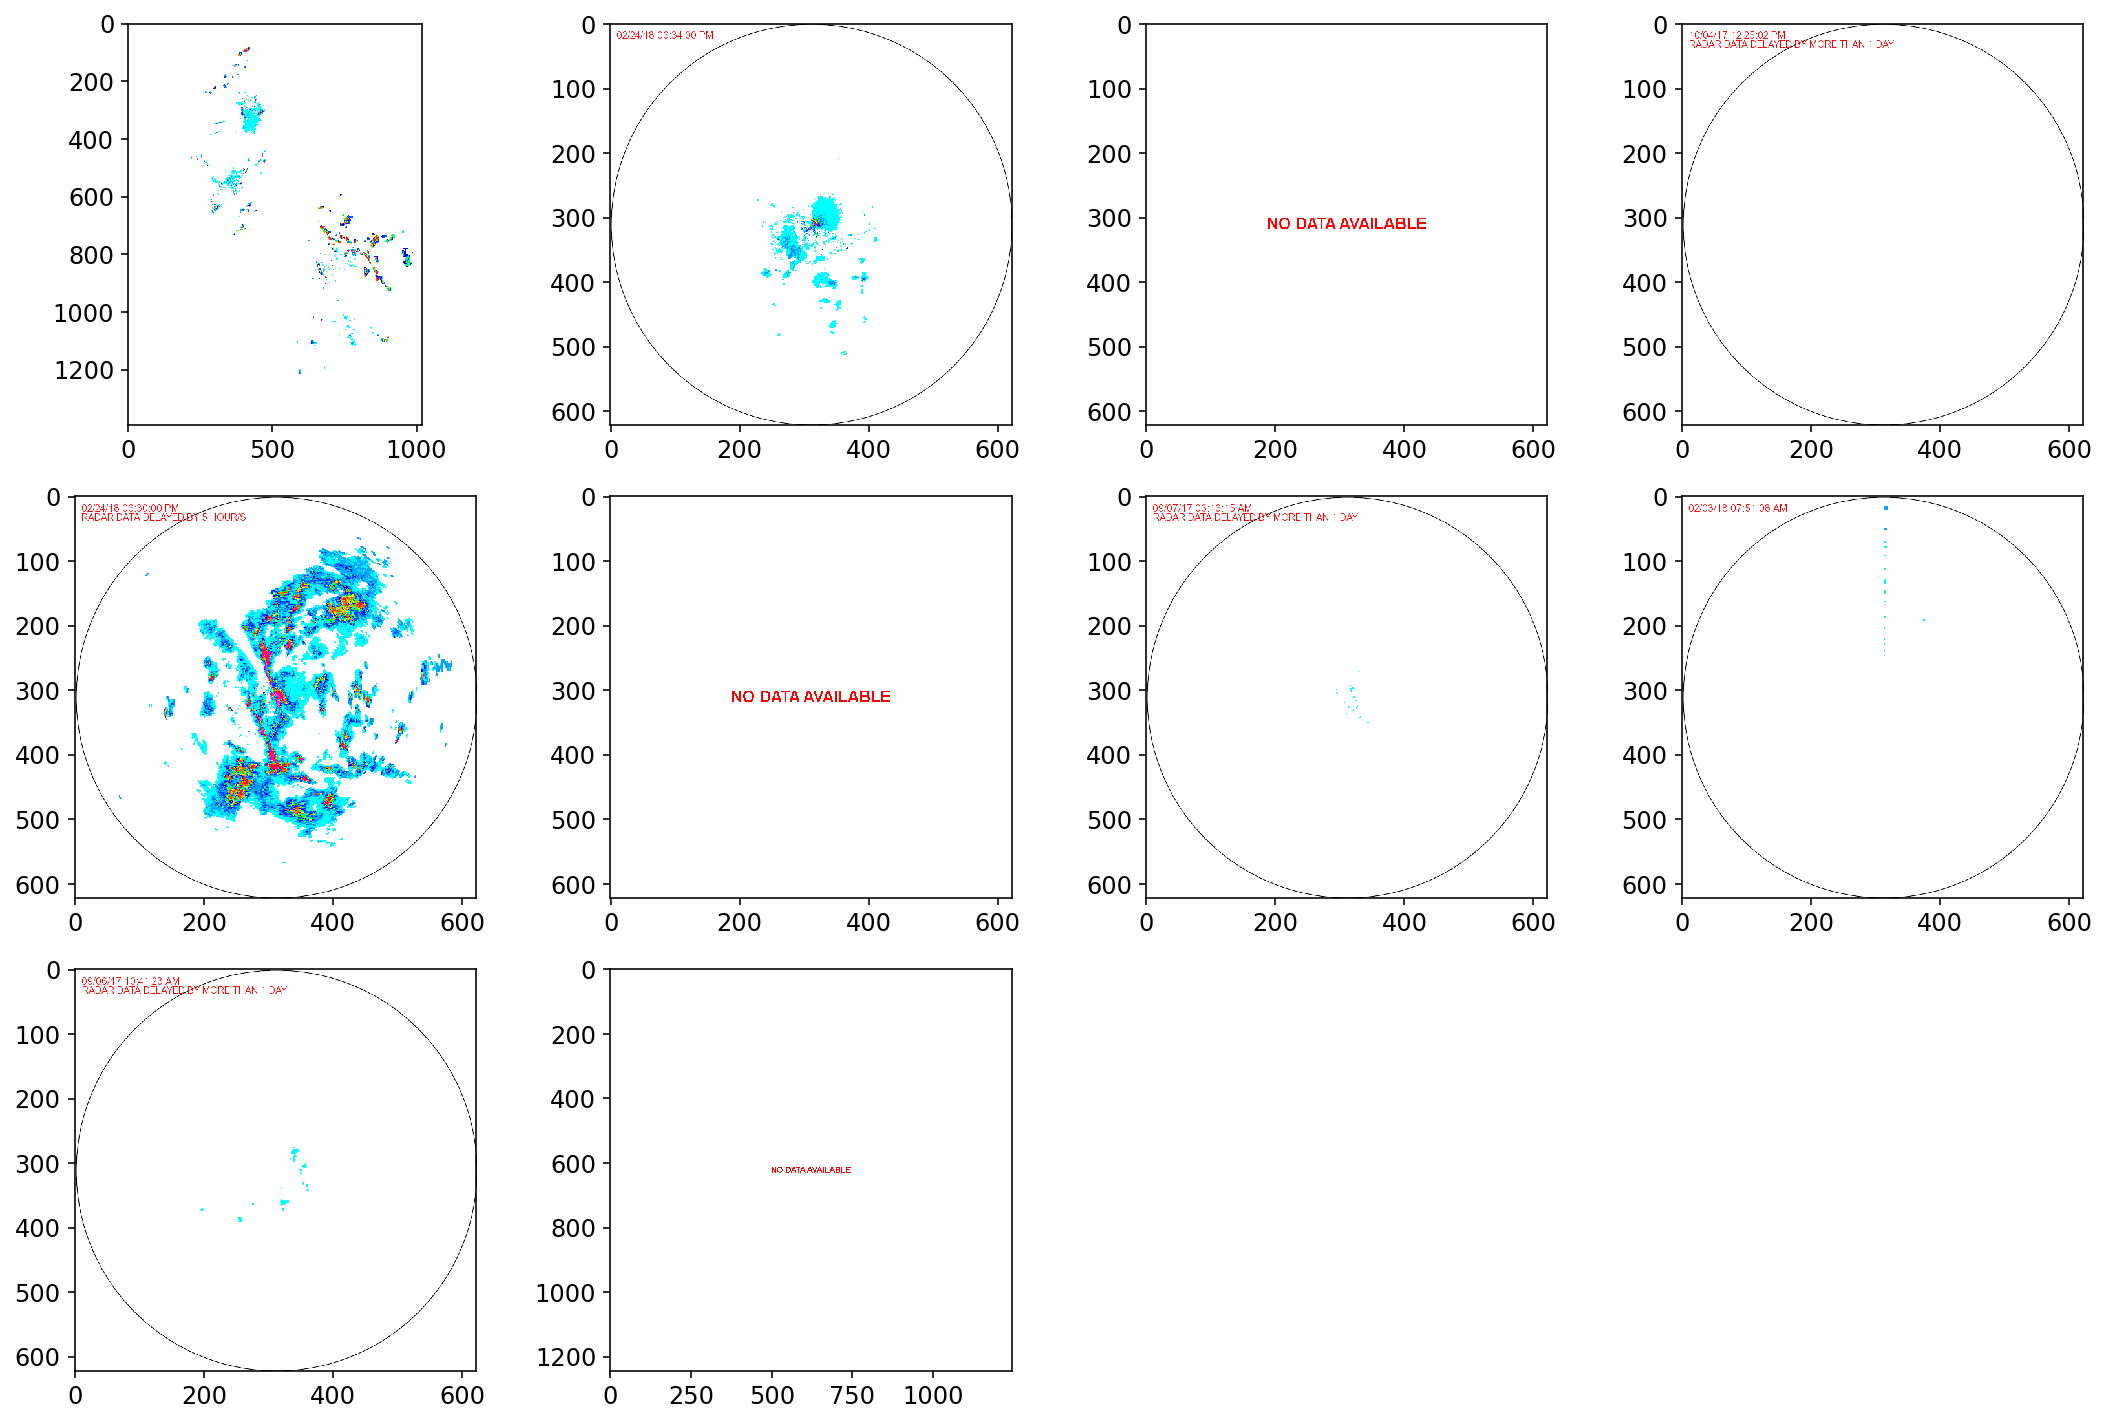

In [7]:
import matplotlib.pyplot as pl
%matplotlib inline

fig = pl.figure(figsize=(15,10))

n=1
for u in json_data['doppler']['url']:
    ax = pl.subplot(3,4,n)
    try:
        img = Image.open(urlopen(u))
        ax.imshow(img)
        n+=1
    except:
        # no data
        pass
fig.tight_layout()

## Landslide maps

In [8]:
json_data['landslide_maps']

,layers,type_id,verbose_name
0,"[{'srid': 4326, 'mun_city_psgc': '175301000', ...",1,Alluvial Fan
1,"[{'srid': 4326, 'mun_city_psgc': '083714000', ...",2,Debris Flow
2,[],3,Deep Seated Landslide
3,[],4,Landslide Inventory
4,"[{'srid': 4326, 'mun_city_psgc': '082601000', ...",5,Potential Rock Slide Zone
5,"[{'srid': 4326, 'mun_city_psgc': '082601000', ...",6,Rock Mass Propagation Extent
6,[],7,Shallow Landslide
7,"[{'srid': 4326, 'mun_city_psgc': '160302000', ...",8,Stability Index
8,"[{'srid': 4326, 'mun_city_psgc': '042101000', ...",9,Combined Landslide
9,"[{'srid': 4326, 'mun_city_psgc': '175301000', ...",10,Unstable Slopes


## Satellite data

In [9]:
json_data['satellite']

,extent,size,url,verbose_name
0,"[100.0, 4.85, 160.0, 29.85]","[800, 334]",http://mahar.pscigrid.gov.ph/static/img/himawa...,HIMAWARI IR
1,"[100.0, 4.85, 160.0, 29.85]","[800, 334]",http://mahar.pscigrid.gov.ph/static/img/himawa...,HIMAWARI IR (Colorized)
2,"[100.0, 4.85, 160.0, 29.85]",None,http://mahar.pscigrid.gov.ph/static/img/himawa...,HIMAWARI + GSMAP
3,"[89.975, -10.525, 155.075, 29.475]","[652, 400]",http://climatex.dost.gov.ph/gsmap/png/accum_1h...,GSMAP 1hr Rainfall
4,"[89.975, -10.525, 155.075, 29.475]","[652, 400]",http://climatex.dost.gov.ph/gsmap/png/accum_3h...,GSMAP 3hr Rainfall
5,"[89.975, -10.525, 155.075, 29.475]","[652, 400]",http://climatex.dost.gov.ph/gsmap/png/accum_6h...,GSMAP 6hr Rainfall
6,"[89.975, -10.525, 155.075, 29.475]","[652, 400]",http://climatex.dost.gov.ph/gsmap/png/accum_12...,GSMAP 12hr Rainfall


In [10]:
img_url = json_data['satellite']['url'][1]
img = Image.open(urlopen(img_url))

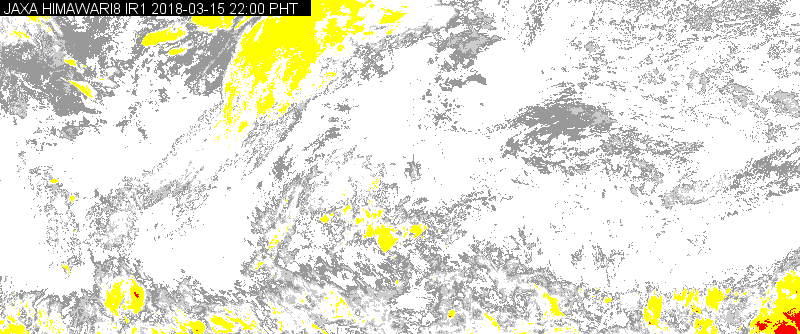

In [11]:
img

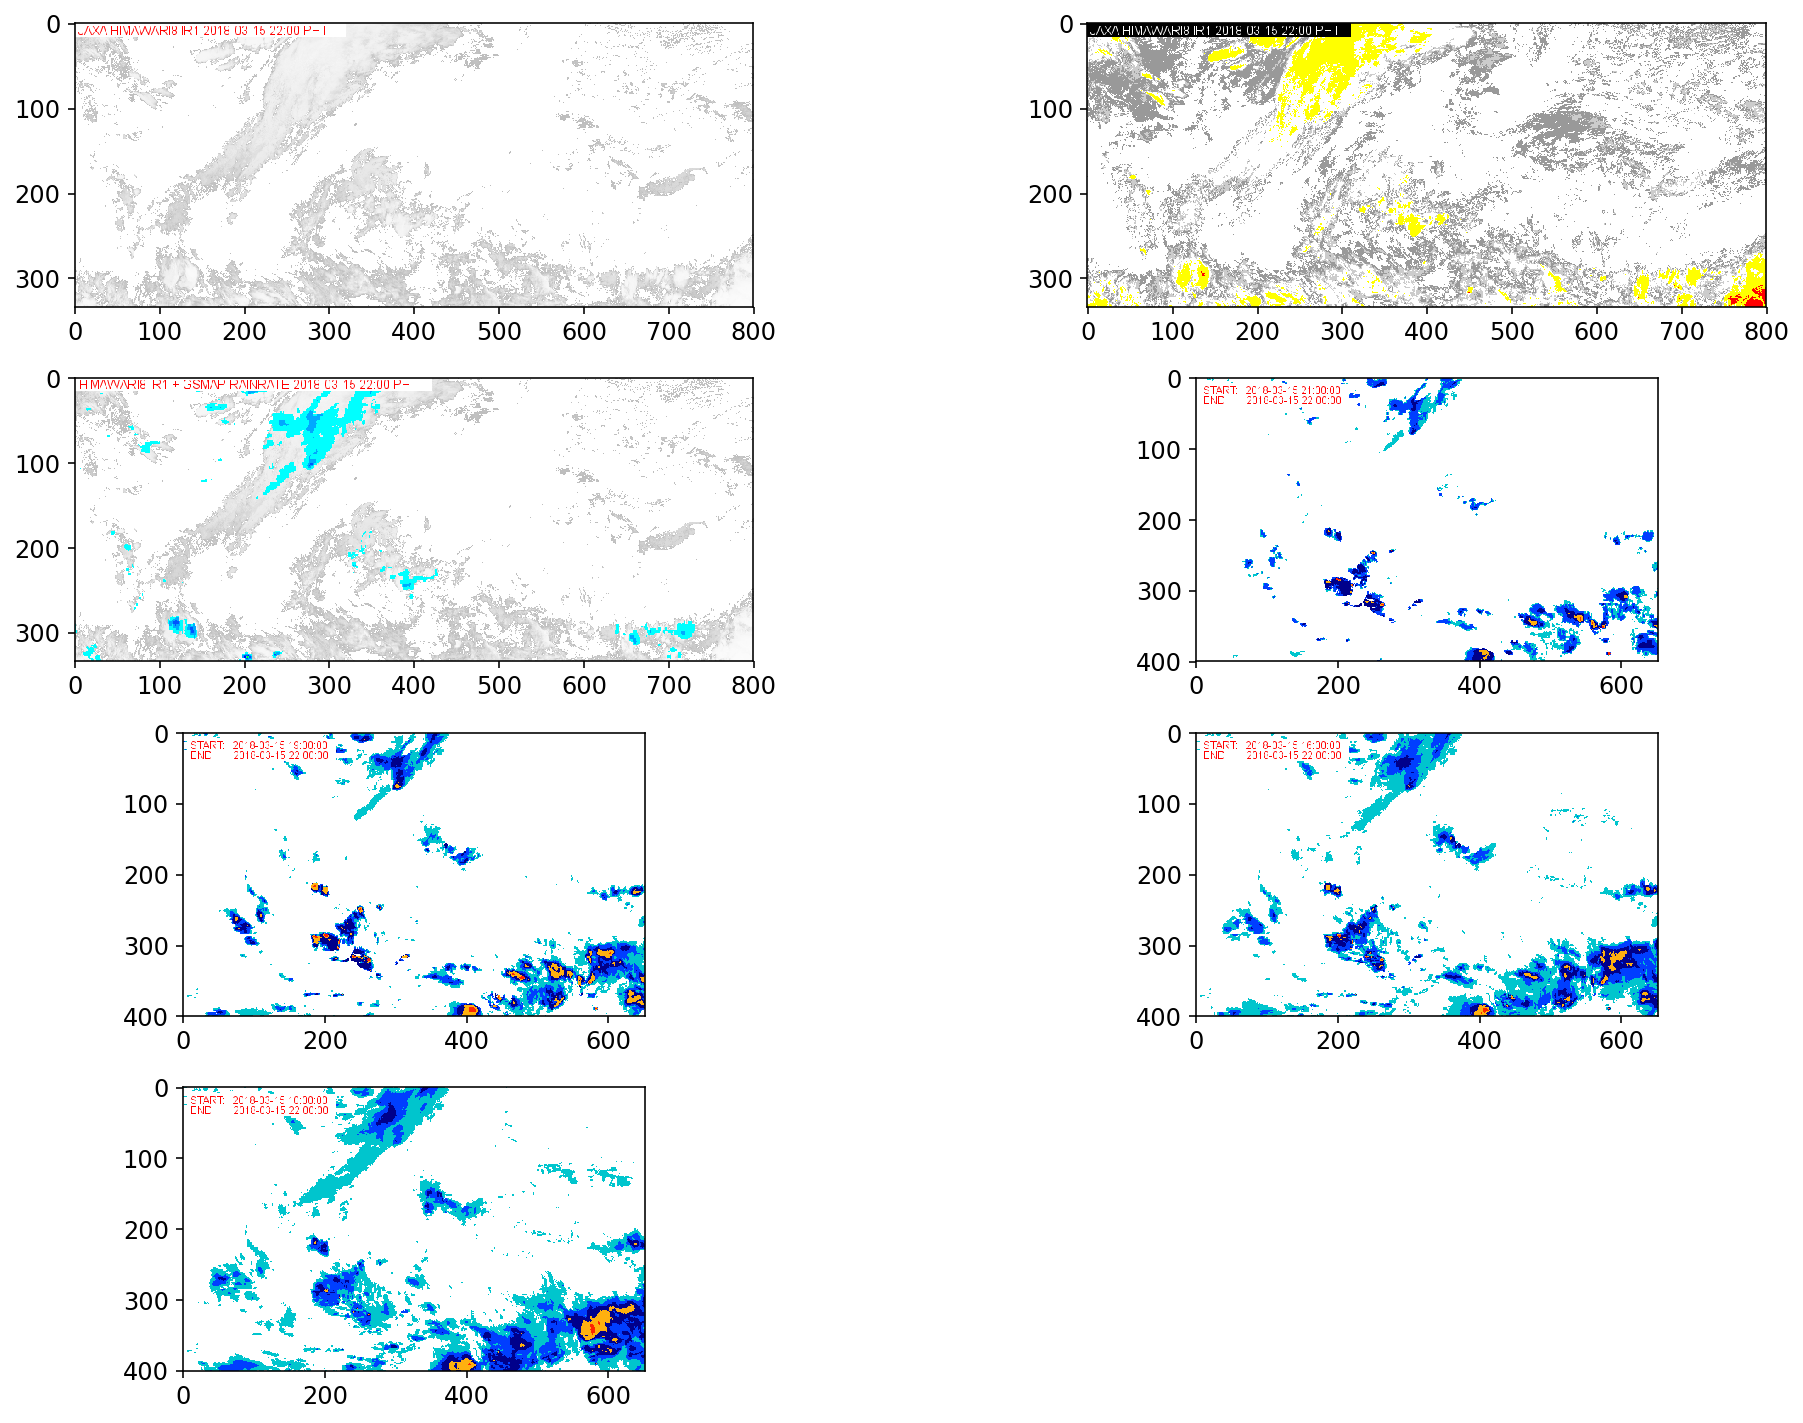

In [12]:
import matplotlib.pyplot as pl
%matplotlib inline

fig = pl.figure(figsize=(15,10))

n=0
for u in json_data['satellite']['url']:
    ax = pl.subplot(4,2,n+1)
    try:
        img = Image.open(urlopen(u))
        ax.imshow(img)
        n+=1
    except:
        # no data
        pass
fig.tight_layout()

## Stations

In [13]:
stations = json_data['stations'].set_index('verbose_name')
stations

,icon,stations,type_id
verbose_name,,,
Automated Weather Stations,blue.png,"[{'lat': 11.250463, 'url': '/api/station/1/27'...",1
Automated Rain Gauges,green.png,"[{'lat': 16.461011, 'url': '/api/station/2/57'...",2
Automated Stream Gauges,red.png,"[{'lat': 12.750617, 'url': '/api/station/3/718...",3
Automated Rain and Stream Gauges,redgreen.png,"[{'lat': 16.586458, 'url': '/api/station/4/339...",4
Tide Level Stations,yellow.png,"[{'lat': 10.6667, 'url': '/api/station/5/997',...",5


In [14]:
for i in stations.index:
    print('{}\t{}'.format(i,len(stations.loc[i]['stations'])))

Automated Weather Stations	218
Automated Rain Gauges	875
Automated Stream Gauges	451
Automated Rain and Stream Gauges	152
Tide Level Stations	274
